In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('aud_data.csv',delimiter=';')

In [3]:
df.head()

,Date,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f24,m1,m2,m3,m4,m5,m6,m7,m8,target
0,31.12.2018,0.2,0.4,-1.0,1.8,-0.7,0.1,0.3,1.2,1.1,...,0.2,5646.3999,6.5999,2.318,1.906,1.900,1.638,-0.75,40.15,0.7049
1,30.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5654.3242,6.5981,2.362,1.942,1.934,1.647,-0.70,40.95,0.7047
4,27.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5597.2378,6.5850,2.378,1.953,1.953,1.646,-1.35,40.20,0.7033


In [4]:
df['Date']=pd.to_datetime(df['Date'], dayfirst = True)

In [5]:
df=df.set_index('Date')

In [6]:
fundamentals=df[[col for col in df.columns if 'f' in col]].columns.tolist()
market=df[[col for col in df.columns if 'm' in col]].columns.tolist()

In [7]:
df[fundamentals]=df[fundamentals].apply(lambda x: x.fillna(method='bfill').fillna(0), axis=0)

In [8]:
market_data=df[market][df.index.dayofweek<5]

In [9]:
market_data.info()
# m6 has half of the data abscent

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2018-12-31 to 1990-12-31
Data columns (total 8 columns):
m1     6733 non-null float64
m2     7306 non-null float64
m3     7291 non-null float64
m4     7161 non-null float64
m5     7179 non-null float64
m6     3550 non-null float64
m7     4962 non-null float64
m8     4966 non-null float64
dtypes: float64(8)
memory usage: 513.7 KB


In [10]:
market_data.head()

,m1,m2,m3,m4,m5,m6,m7,m8
Date,,,,,,,,
2018-12-31,5646.3999,6.5999,2.318,1.906,1.900,1.638,-0.75,40.15
2018-12-28,5654.3242,6.5981,2.362,1.942,1.934,1.647,-0.70,40.95
2018-12-27,5597.2378,6.5850,2.378,1.953,1.953,1.646,-1.35,40.20
2018-12-26,NaN,6.6159,2.363,1.934,1.947,1.628,-2.70,41.96
2018-12-25,NaN,6.5878,2.363,1.934,1.947,1.656,-2.70,41.96


## Adding features

In [11]:
f0=market_data.pct_change(periods=1,fill_method=None)
f1=market_data.pct_change(periods=5,fill_method=None)
f2=market_data.pct_change(periods=10,fill_method=None)
f3=market_data.pct_change(periods=30,fill_method=None)

f4=market_data.rolling(5).mean()
f5=market_data.rolling(10).mean()
f6=market_data.rolling(30).mean()

In [12]:
market_data[['m'+str(i)+'_pct_change' for i in range(1,9)]]=f0
market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]]=f1
market_data[['m'+str(i)+'_pct_change_10' for i in range(1,9)]]=f2
market_data[['m'+str(i)+'_pct_change_30' for i in range(1,9)]]=f3

market_data[['m'+str(i)+'_mva_5' for i in range(1,9)]]=f4
market_data[['m'+str(i)+'_mva_10' for i in range(1,9)]]=f5
market_data[['m'+str(i)+'_mva_30' for i in range(1,9)]]=f6

## Dealing with outliers

In [13]:
def remove_outliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    return data[(data>(Q1-1.5*IQR)) & (data<(Q3+1.5*IQR))]

In [21]:
pct_change=['m1_pct_change','m2_pct_change', 'm3_pct_change', 'm4_pct_change',\
'm5_pct_change','m6_pct_change', 'm7_pct_change', 'm8_pct_change']

In [27]:
m=remove_outliers(market_data[pct_change])

market_data=market_data.loc[m.index,:]

In [32]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2018-12-31 to 1990-12-31
Data columns (total 64 columns):
m1                  6733 non-null float64
m2                  7306 non-null float64
m3                  7291 non-null float64
m4                  7161 non-null float64
m5                  7179 non-null float64
m6                  3550 non-null float64
m7                  4962 non-null float64
m8                  4966 non-null float64
m1_pct_change       6584 non-null float64
m2_pct_change       7305 non-null float64
m3_pct_change       7276 non-null float64
m4_pct_change       7087 non-null float64
m5_pct_change       7118 non-null float64
m6_pct_change       3430 non-null float64
m7_pct_change       4949 non-null float64
m8_pct_change       4953 non-null float64
m1_pct_change_5     6554 non-null float64
m2_pct_change_5     7301 non-null float64
m3_pct_change_5     7272 non-null float64
m4_pct_change_5     7077 non-null float64
m5_pct_change_5     7108 non-null f

In [43]:
market_data=market_data.drop(market,axis=1)

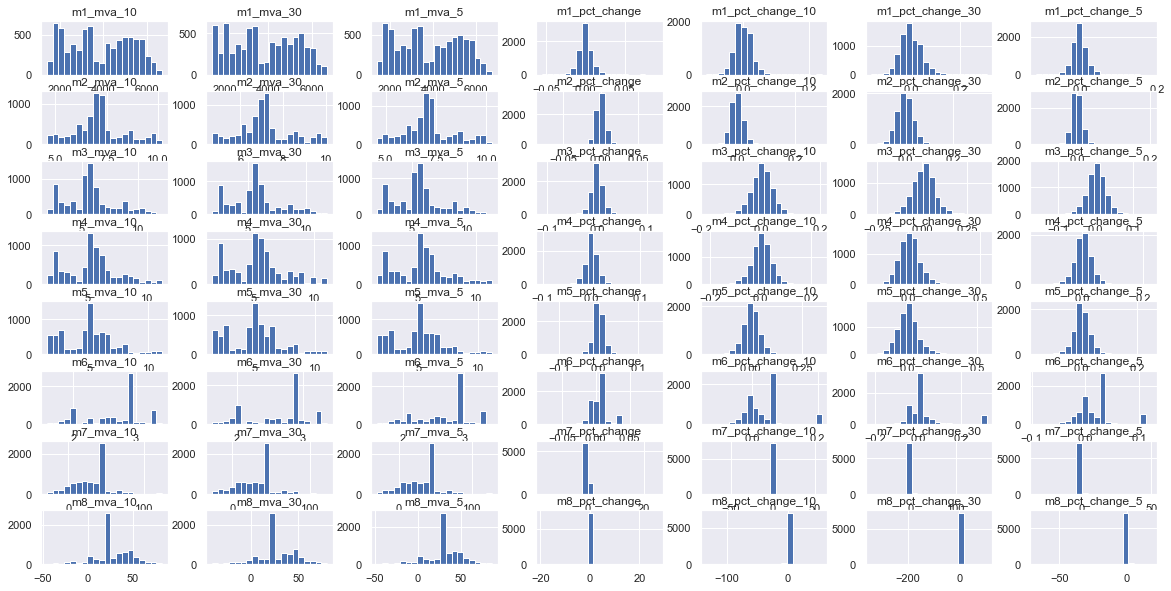

In [44]:
market_data.hist(figsize=(20, 10), bins=20);

In [45]:
market_data=market_data.fillna(method='bfill').fillna(method='ffill')

## Selecting features

In [46]:
def select_corr(data,threshold):
    corr=data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    data = data[selected_columns]
    return data

In [47]:
md_selected=select_corr(market_data,0.3)

In [48]:
md_selected.columns

Index(['m1_pct_change', 'm2_pct_change', 'm3_pct_change', 'm6_pct_change',
       'm7_pct_change', 'm8_pct_change', 'm7_pct_change_5', 'm8_pct_change_5',
       'm7_pct_change_10', 'm8_pct_change_10', 'm7_pct_change_30',
       'm8_pct_change_30', 'm1_mva_5', 'm7_mva_5'],
      dtype='object')

In [50]:
md_selected.head().T

Date,2018-12-31 00:00:00,2018-12-28 00:00:00,2018-12-27 00:00:00,2018-12-26 00:00:00,2018-12-25 00:00:00
m1_pct_change,0.001403,0.001403,-0.010096,-0.004762,-0.004762
m2_pct_change,-0.000273,-0.000273,-0.001985,0.004692,-0.004247
m3_pct_change,0.018982,0.018982,0.006774,-0.006308,0.000000
m6_pct_change,0.005495,0.005495,-0.000607,-0.010936,0.017199
m7_pct_change,-0.066667,-0.066667,0.928571,1.000000,0.000000
m8_pct_change,0.019925,0.019925,-0.018315,0.043781,0.000000
m7_pct_change_5,2.600000,2.600000,2.600000,2.600000,2.600000
m8_pct_change_5,0.044832,0.044832,0.044832,0.044832,0.044832
m7_pct_change_10,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
m8_pct_change_10,-0.012453,-0.012453,-0.012453,-0.012453,-0.012453


## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [53]:
tscv = TimeSeriesSplit(n_splits=3)

In [54]:
X=md_selected
y=df[['target']].loc[md_selected.index,]

In [55]:
print(np.mean(cross_val_score(LinearRegression(), X, y, cv=tscv, scoring='neg_mean_squared_error')))

-0.3130314112239845


## Elastic Net

In [76]:
from sklearn.metrics import mean_squared_error

def mse(y_actual, y_predicted):
    return mean_squared_error(y_actual, y_predicted)

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
alphas=np.linspace(-2, 2, 30)
ratios=np.linspace(0, 1, 10)

In [62]:
params=({'alpha':alphas,
        'l1_ratio': ratios
        })

In [68]:
param_comb=10

In [69]:
mdl=RandomizedSearchCV(ElasticNet(), params, cv=tscv,scoring='neg_mean_squared_error',n_iter=param_comb)

In [70]:
mdl.fit(X_train,y_train);

In [71]:
pred_en=mdl.best_estimator_.predict(X_test)

In [77]:
mse(y_test,pred_en)

0.013928624883486658

## Gradient Boosting

In [79]:
import xgboost as xgb
from xgboost import plot_importance

In [80]:
n_estimators=range(100,1100,100)
learning_rates=np.linspace(0,1,10)
depth=range(2,10)

param_comb=10
# estimating only 10 combinations

In [81]:
params=({'learning_rate':learning_rates,
        'max_depth': depth,
         'n_estimators':n_estimators
        })

In [82]:
xgb=xgb.XGBRegressor()

In [83]:
random_search=RandomizedSearchCV(xgb, params,n_iter=param_comb, 
                                 scoring='neg_mean_squared_error',cv=tscv)

In [84]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'learning_rate': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ]), 'max_depth': range(2, 10), 'n_estimators': range(100, 1100, 100)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [85]:
print('Best score \n', random_search.best_score_,
      '\n \n Best parameters \n', random_search.best_params_,
      '\n \n Best estimator \n', random_search.best_estimator_)

Best score 
 -0.002021631338862314 
 
 Best parameters 
 {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2222222222222222} 
 
 Best estimator 
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2222222222222222,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [86]:
mse(y_test,random_search.best_estimator_.predict(X_test))

0.0012445674845329598

In [ ]:
# feature importance plot as well

## Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100,1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [88]:
param_comb=10

In [90]:
random_search=RandomizedSearchCV(RandomForestRegressor(), random_grid,n_iter=param_comb, 
                                 scoring='neg_mean_squared_error',cv=tscv)

In [91]:
random_search.fit(X_train,y_train);

C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MO_Reuters_2\AppData\Local\C

C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MO_Reuters_2\AppData\Local\C

RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='

In [94]:
print('Best score \n', random_search.best_score_,
      '\n \n Best parameters \n', random_search.best_params_,
      '\n \n Best estimator \n', random_search.best_estimator_)

Best score 
 -0.0019300669486908366 
 
 Best parameters 
 {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True} 
 
 Best estimator 
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [95]:
mse(y_test,random_search.best_estimator_.predict(X_test))

0.0011710850303743561